# Importing the Libraries


In [15]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
import random

# Fetching the dataset

In [16]:
from sklearn.datasets import fetch_olivetti_faces
dataset = fetch_olivetti_faces()

# **Olivetti Dataset **

Brief information about Olivetti Dataset:

    -> Face images taken between April 1992 and April 1994.
    -> There are ten different image of each of 40 distinct people
    -> There are 400 face images in the dataset
    -> Face images were taken at different times, variying ligthing, facial express and facial detail
    -> All face images have black background
    -> The images are gray level
    -> Size of each image is 64x64
    -> Image pixel values were scaled to [0, 1] interval
    -> Names of 40 people were encoded to an integer from 0 to 39

# Exploring the Dataset

In [17]:
dataset

{'data': array([[0.30991736, 0.3677686 , 0.41735536, ..., 0.15289256, 0.16115703,
         0.1570248 ],
        [0.45454547, 0.47107437, 0.5123967 , ..., 0.15289256, 0.15289256,
         0.15289256],
        [0.3181818 , 0.40082645, 0.49173555, ..., 0.14049587, 0.14876033,
         0.15289256],
        ...,
        [0.5       , 0.53305787, 0.607438  , ..., 0.17768595, 0.14876033,
         0.19008264],
        [0.21487603, 0.21900827, 0.21900827, ..., 0.57438016, 0.59090906,
         0.60330576],
        [0.5165289 , 0.46280992, 0.28099173, ..., 0.35950413, 0.3553719 ,
         0.38429752]], dtype=float32),
 'images': array([[[0.30991736, 0.3677686 , 0.41735536, ..., 0.37190083,
          0.3305785 , 0.30578512],
         [0.3429752 , 0.40495867, 0.43801653, ..., 0.37190083,
          0.338843  , 0.3140496 ],
         [0.3429752 , 0.41735536, 0.45041323, ..., 0.38016528,
          0.338843  , 0.29752067],
         ...,
         [0.21487603, 0.20661157, 0.2231405 , ..., 0.15289256,
     

In [18]:
print(dir(dataset))

['DESCR', 'data', 'images', 'target']


In [19]:
print(dataset['DESCR'])

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   ===========

In [20]:
print(len(dataset['images']))

400


In [21]:
print(len(dataset['target']))

400


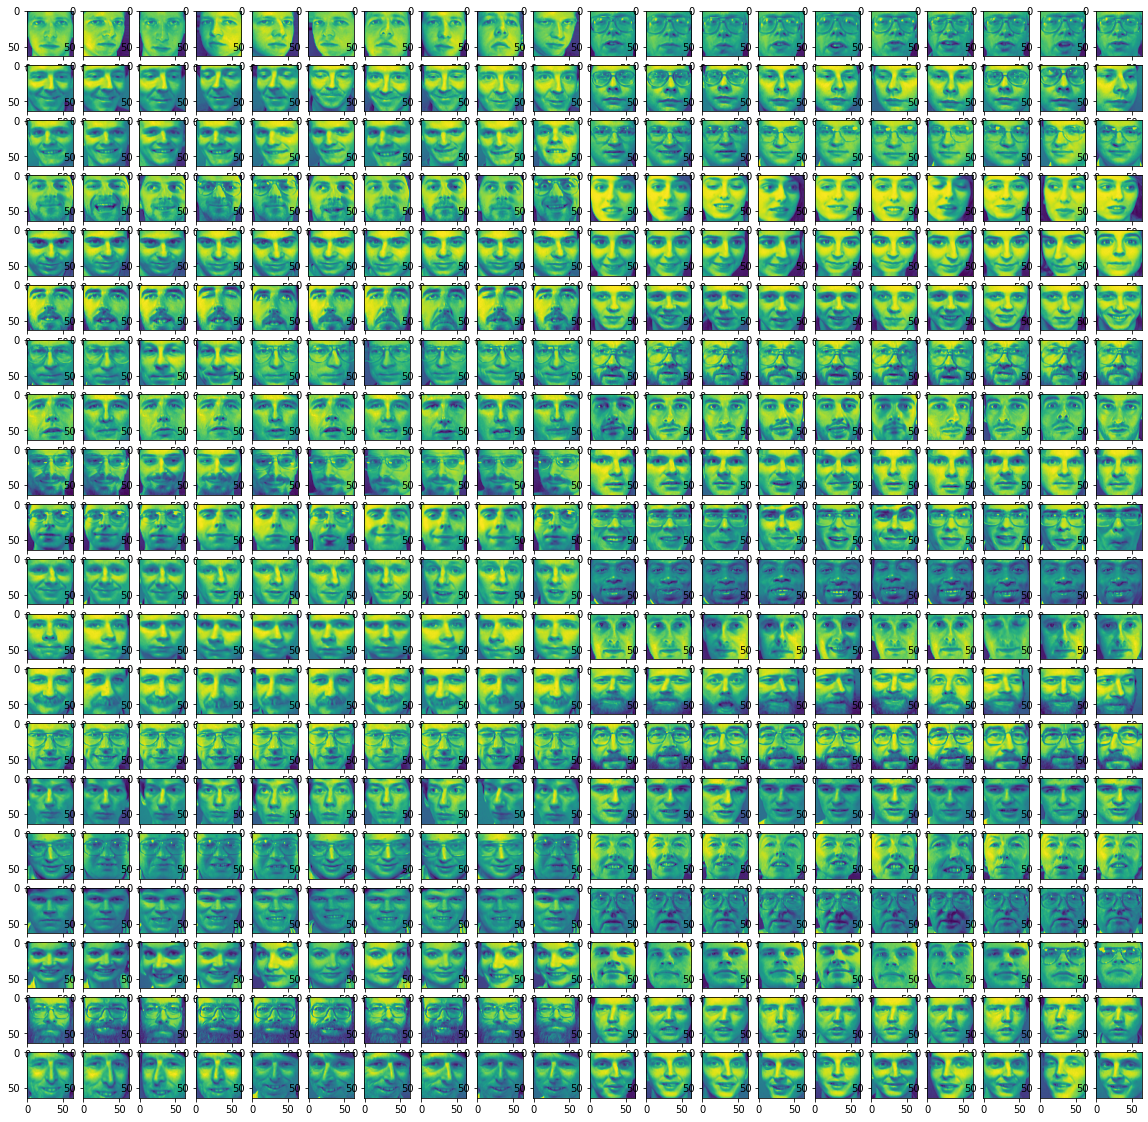

In [22]:
fig = plt.figure(figsize=(20,20))
for x in range(400):
    plt.subplot(20,20,x+1)
    plt.imshow(dataset['images'][x])
plt.show()   

# Adding  Noise to Images

In [23]:
noisy = dataset['images'] + dataset['images'].std()*3*np.random.random(64)

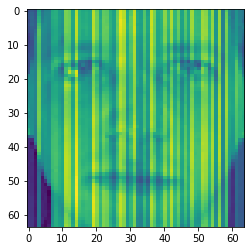

In [24]:
plt.imshow(noisy[0])

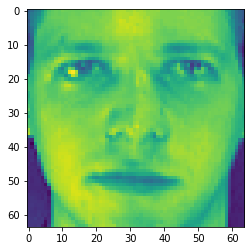

In [25]:
plt.imshow(dataset['images'][0])

# Splitting and Reshaping the Data

In [26]:
train = dataset['images'][:320]
test =  dataset['images'][320:400]
noisy_train = noisy[:320]
noisy_test = noisy[320:400]
train = train.reshape(320,64,64,1)
test = test.reshape(80,64,64,1)
noisy_train = noisy_train.reshape(320,64,64,1)
noisy_test = noisy_test.reshape(80,64,64,1)

# Setting up and Training the Model

In [34]:
input_img = Input(shape=(64, 64, 1))

nn = Conv2D(64, (3, 3), activation='relu', padding='same')(input_img)
nn = MaxPooling2D((2, 2), padding='same')(nn)
nn = Conv2D(64, (3, 3), activation='relu', padding='same')(nn)
encoded = MaxPooling2D((2, 2), padding='same')(nn)


nn = Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
nn = UpSampling2D((2, 2))(nn)
nn = Conv2D(64, (3, 3), activation='relu', padding='same')(nn)
nn = UpSampling2D((2, 2))(nn)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(nn)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta',loss='binary_crossentropy')
autoencoder.fit(noisy_train, train,epochs=500,validation_data=(noisy_test, test))

Train on 320 samples, validate on 80 samples
Epoch 1/500
320/320 [==============================] - 1s 2ms/step - loss: 0.6818 - val_loss: 0.7064
Epoch 2/500
320/320 [==============================] - 0s 427us/step - loss: 0.6806 - val_loss: 0.6944
Epoch 3/500
320/320 [==============================] - 0s 383us/step - loss: 0.6762 - val_loss: 0.6933
Epoch 4/500
320/320 [==============================] - 0s 387us/step - loss: 0.6760 - val_loss: 0.6912
Epoch 5/500
320/320 [==============================] - 0s 377us/step - loss: 0.6756 - val_loss: 0.6869
Epoch 6/500
320/320 [==============================] - 0s 374us/step - loss: 0.6744 - val_loss: 0.6782
Epoch 7/500
320/320 [==============================] - 0s 368us/step - loss: 0.6686 - val_loss: 0.6722
Epoch 8/500
320/320 [==============================] - 0s 373us/step - loss: 0.6706 - val_loss: 0.6789
Epoch 9/500
320/320 [==============================] - 0s 372us/step - loss: 0.6666 - val_loss: 0.6683
Epoch 10/500
320/320 [========

320/320 [==============================] - 0s 404us/step - loss: 0.6355 - val_loss: 0.6426
Epoch 80/500
320/320 [==============================] - 0s 372us/step - loss: 0.6359 - val_loss: 0.6442
Epoch 81/500
320/320 [==============================] - 0s 370us/step - loss: 0.6361 - val_loss: 0.6465
Epoch 82/500
320/320 [==============================] - 0s 375us/step - loss: 0.6370 - val_loss: 0.6487
Epoch 83/500
320/320 [==============================] - 0s 380us/step - loss: 0.6358 - val_loss: 0.6485
Epoch 84/500
320/320 [==============================] - 0s 379us/step - loss: 0.6355 - val_loss: 0.6521
Epoch 85/500
320/320 [==============================] - 0s 377us/step - loss: 0.6360 - val_loss: 0.6457
Epoch 86/500
320/320 [==============================] - 0s 367us/step - loss: 0.6364 - val_loss: 0.6413
Epoch 87/500
320/320 [==============================] - 0s 372us/step - loss: 0.6345 - val_loss: 0.6434
Epoch 88/500
320/320 [==============================] - 0s 364us/step - loss:

320/320 [==============================] - 0s 375us/step - loss: 0.6330 - val_loss: 0.6404
Epoch 158/500
320/320 [==============================] - 0s 383us/step - loss: 0.6323 - val_loss: 0.6463
Epoch 159/500
320/320 [==============================] - 0s 376us/step - loss: 0.6334 - val_loss: 0.6440
Epoch 160/500
320/320 [==============================] - 0s 370us/step - loss: 0.6335 - val_loss: 0.6416
Epoch 161/500
320/320 [==============================] - 0s 364us/step - loss: 0.6317 - val_loss: 0.6423
Epoch 162/500
320/320 [==============================] - 0s 368us/step - loss: 0.6337 - val_loss: 0.6414
Epoch 163/500
320/320 [==============================] - 0s 364us/step - loss: 0.6324 - val_loss: 0.6417
Epoch 164/500
320/320 [==============================] - 0s 364us/step - loss: 0.6330 - val_loss: 0.6407
Epoch 165/500
320/320 [==============================] - 0s 374us/step - loss: 0.6330 - val_loss: 0.6401
Epoch 166/500
320/320 [==============================] - 0s 364us/ste

320/320 [==============================] - 0s 372us/step - loss: 0.6307 - val_loss: 0.6411
Epoch 236/500
320/320 [==============================] - 0s 374us/step - loss: 0.6321 - val_loss: 0.6385
Epoch 237/500
320/320 [==============================] - 0s 374us/step - loss: 0.6313 - val_loss: 0.6381
Epoch 238/500
320/320 [==============================] - 0s 370us/step - loss: 0.6311 - val_loss: 0.6398
Epoch 239/500
320/320 [==============================] - 0s 370us/step - loss: 0.6308 - val_loss: 0.6376
Epoch 240/500
320/320 [==============================] - 0s 367us/step - loss: 0.6297 - val_loss: 0.6401
Epoch 241/500
320/320 [==============================] - 0s 366us/step - loss: 0.6326 - val_loss: 0.6405
Epoch 242/500
320/320 [==============================] - 0s 374us/step - loss: 0.6307 - val_loss: 0.6411
Epoch 243/500
320/320 [==============================] - 0s 374us/step - loss: 0.6316 - val_loss: 0.6406
Epoch 244/500
320/320 [==============================] - 0s 370us/ste

320/320 [==============================] - 0s 378us/step - loss: 0.6294 - val_loss: 0.6388
Epoch 314/500
320/320 [==============================] - 0s 419us/step - loss: 0.6304 - val_loss: 0.6394
Epoch 315/500
320/320 [==============================] - 0s 380us/step - loss: 0.6305 - val_loss: 0.6378
Epoch 316/500
320/320 [==============================] - 0s 403us/step - loss: 0.6287 - val_loss: 0.6370
Epoch 317/500
320/320 [==============================] - 0s 432us/step - loss: 0.6311 - val_loss: 0.6408
Epoch 318/500
320/320 [==============================] - 0s 433us/step - loss: 0.6303 - val_loss: 0.6399
Epoch 319/500
320/320 [==============================] - 0s 417us/step - loss: 0.6303 - val_loss: 0.6407
Epoch 320/500
320/320 [==============================] - 0s 394us/step - loss: 0.6299 - val_loss: 0.6387
Epoch 321/500
320/320 [==============================] - 0s 375us/step - loss: 0.6308 - val_loss: 0.6385
Epoch 322/500
320/320 [==============================] - 0s 377us/ste

320/320 [==============================] - 0s 873us/step - loss: 0.6300 - val_loss: 0.6380
Epoch 392/500
320/320 [==============================] - 0s 606us/step - loss: 0.6299 - val_loss: 0.6380
Epoch 393/500
320/320 [==============================] - 0s 505us/step - loss: 0.6296 - val_loss: 0.6399
Epoch 394/500
320/320 [==============================] - 0s 477us/step - loss: 0.6301 - val_loss: 0.6374
Epoch 395/500
320/320 [==============================] - 0s 479us/step - loss: 0.6301 - val_loss: 0.6387
Epoch 396/500
320/320 [==============================] - 0s 387us/step - loss: 0.6291 - val_loss: 0.6383
Epoch 397/500
320/320 [==============================] - 0s 426us/step - loss: 0.6301 - val_loss: 0.6387
Epoch 398/500
320/320 [==============================] - 0s 365us/step - loss: 0.6303 - val_loss: 0.6394
Epoch 399/500
320/320 [==============================] - 0s 378us/step - loss: 0.6295 - val_loss: 0.6395
Epoch 400/500
320/320 [==============================] - 0s 368us/ste

320/320 [==============================] - 0s 370us/step - loss: 0.6299 - val_loss: 0.6377
Epoch 470/500
320/320 [==============================] - 0s 369us/step - loss: 0.6282 - val_loss: 0.6366
Epoch 471/500
320/320 [==============================] - 0s 369us/step - loss: 0.6298 - val_loss: 0.6387
Epoch 472/500
320/320 [==============================] - 0s 370us/step - loss: 0.6290 - val_loss: 0.6366
Epoch 473/500
320/320 [==============================] - 0s 369us/step - loss: 0.6298 - val_loss: 0.6368
Epoch 474/500
320/320 [==============================] - 0s 371us/step - loss: 0.6294 - val_loss: 0.6375
Epoch 475/500
320/320 [==============================] - 0s 375us/step - loss: 0.6294 - val_loss: 0.6378
Epoch 476/500
320/320 [==============================] - 0s 390us/step - loss: 0.6282 - val_loss: 0.6371
Epoch 477/500
320/320 [==============================] - 0s 377us/step - loss: 0.6295 - val_loss: 0.6378
Epoch 478/500
320/320 [==============================] - 0s 363us/ste

# Predicting the Model

In [31]:
decoded_imgs = autoencoder.predict(noisy_test)

# Noisy Image

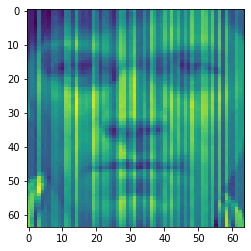

In [36]:
plt.imshow(noisy_test[0].reshape(64,64))

# Reconstructed Image After 500 epochs

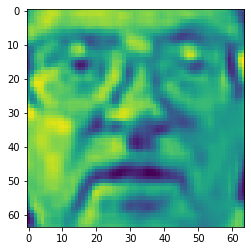

In [40]:
plt.imshow(decoded_imgs[11].reshape(64,64))

# Reconstructed Image After 1000 epochs

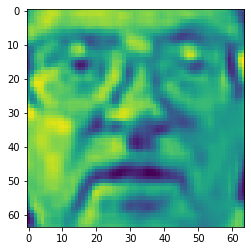

In [41]:
plt.imshow(decoded_imgs[11].reshape(64,64))

# Original Image

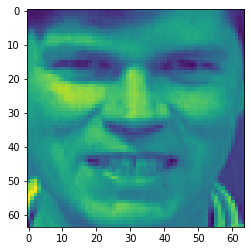

In [38]:
plt.imshow(test[11].reshape(64,64))

# Therefore, by using Convolutional Autoencoders, we were able to denoise and reconstruct the images successfully